# CUSP UCSL 2016
## utility NB for darts gaussian distribution plot (darts)
## FBB JUNE 2016

In [9]:
__author__ = "__fbbianco__"
from __future__ import print_function
from __future__ import division
import os
import pylab as pl
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
N = 10000
def circlepoint(r, c, theta):
    return()
def circle(r, c):
    cx, cy = np.zeros(N), np.zeros(N)
    for i, x in enumerate(np.linspace(c[0] - r, c[0] + r, N)):
        cx[i] = x
        cy[i] = np.sqrt(r ** 2 - (x - c[0]) ** 2) + c[1]
    return cx, cy
        
def wedges(r, c, nw, v, mod):
    cx, cy = np.zeros(N), np.zeros(N)
    ii = 0
    for i, x in enumerate(np.linspace(c[0] - r, c[0] + r, N)):
        y = np.sqrt(r ** 2 - (x - c[0]) ** 2) + c[1]
        theta = np.arctan(y / x)
        if int((theta * 180 / np.pi / 360. + v) * nw) % 2 ==  mod:
            #print "hrtr", theta, int(theta * 180 / np.pi / 360. * nw)%2
            cx[ii] = x
            cy[ii] = y
            ii +=  1
    return cx, cy  

[-3.99953095  0.18536081  1.80607161 -1.00487207  1.46264157  0.52843768
 -0.05764066 -2.64008666 -0.87899166  0.01000289 -1.41605397  0.37032698
 -1.6671901   1.13369414  0.84544161 -0.70882229 -1.56256075  1.55946537
 -1.37627125 -2.73663649  2.73796332  2.58321035 -1.00375828 -2.18487148
 -0.13096262  1.3741644   0.96200069  2.22311225 -1.15247612 -0.38864797
 -0.05520078 -3.38643399 -2.01270461  1.13290802  1.00088952 -1.41189385
  1.87924454 -3.88123365 -3.2127981  -2.96486903 -1.58887832 -1.83634347
 -0.48537087 -1.72587747  2.09949615 -3.96619125 -2.4666202   0.21501551
 -3.72715701  2.44142773 -2.87603519 -1.59949239 -2.38009232 -2.15586473
 -0.28227306  0.51561918 -2.22445469  1.99893949 -0.65922249 -2.27946296
 -2.26359678 -0.4627221  -0.02431076 -0.4729029  -3.7710588  -2.58841976
  0.72607776  0.97241043  1.55384288 -3.36438122 -4.1823766   0.23218645
 -1.16355427 -1.87843596  3.56921512 -1.60142882  1.00090666 -3.11398468
  0.66114667 -2.70904619  0.88024294  0.87378013 -3

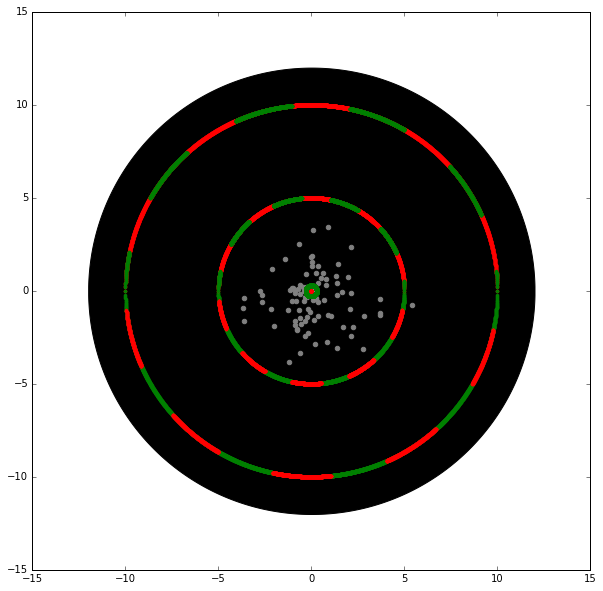

In [12]:
np.random.seed(100)
fig = pl.figure(figsize = (10, 10))
mycircle = circle(12, [0, 0])
pl.fill_between(mycircle[0], mycircle[1] * ( - 1), mycircle[1], \
                where = mycircle[1] > mycircle[1] * ( - 1.0), color = 'black')
mycircleout = circle(10, [0, 0])
pl.plot(mycircleout[0], - mycircleout[1], '.', color = 'green')
pl.plot(mycircleout[0], mycircleout[1], '.', color = 'red')
mycirclein = circle(5, [0, 0])
pl.plot(mycirclein[0], - mycirclein[1], '.', color = 'green')
pl.plot(mycirclein[0], mycirclein[1], '.', color = 'red')
mywedges = wedges(5, [0, 0], 20, 360. / 27, 0)
pl.plot(mywedges[0], mywedges[1], '.', color = 'green')
mywedges = wedges(5, [0, 0], 20, - 360. / 27, 1)
pl.plot(mywedges[0], - mywedges[1], '.', color = 'red')

mywedges = wedges(10, [0, 0], 20, 360. / 27, 0)
pl.plot(mywedges[0], mywedges[1], '.', color = 'green')
mywedges = wedges(10, [0, 0], 20, - 360. / 27, 1)
pl.plot(mywedges[0], - mywedges[1], '.', color = 'red')
mycircleinner = circle(0.3, [0, 0])
pl.plot(mycircleinner[0], - mycircleinner[1], '.', color = 'green')
pl.plot(mycircleinner[0], mycircleinner[1], '.', color = 'green')

rs = 2 * np.random.randn(100) - 0.5
print (rs)
for i, f in enumerate(range(100)):
    
    theta = (np.random.rand() * np.pi)
    pl.scatter(rs[i] * np.cos(theta), rs[i] * np.sin(theta), color = 'gray')
    #pl.savefig(os.getenv('PUI15PLOTS') + ' / board_%02d.png'%f, transparent = True)  
    

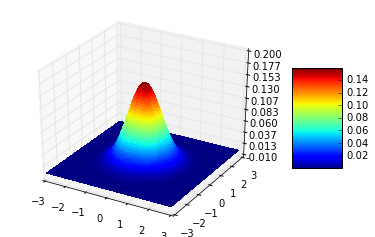

In [13]:
mygauss = lambda x: np.exp( - (x) ** 2)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.gca(projection = '3d')
X = np.arange( - 3, 3, 0.05)
Y = np.arange( - 3, 3, 0.05)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(mygauss(X) ** 2 + mygauss(Y) ** 2)
Z = 1.0 / (2.0 * pi) * mygauss(X) * mygauss(Y)
surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.jet, 
        linewidth = 0, antialiased = False)
ax.set_zlim3d( - .01, .2)

ax.w_zaxis.set_major_locator(LinearLocator(10))
ax.w_zaxis.set_major_formatter(FormatStrFormatter('%.03f'))

fig.colorbar(surf, shrink = 0.5, aspect = 2)

#plt.savefig('figsurface.png')